[The SHAP Values with H2O Models](https://medium.com/dataman-in-ai/the-shap-values-with-h2o-models-773a203b75e3)

In [1]:
import h2o

In [2]:
#> H2Oクラスターの開始
h2o.init(url='http://52.194.227.22:54321')

Checking whether there is an H2O instance running at http://52.194.227.22:54321 . connected.
Attempting to start a local H2O server...
  Java Version: java version "11.0.9" 2020-10-20 LTS; Java(TM) SE Runtime Environment 18.9 (build 11.0.9+7-LTS); Java HotSpot(TM) 64-Bit Server VM 18.9 (build 11.0.9+7-LTS, mixed mode)
  Starting server from /opt/anaconda3/envs/H2O_3_ServerClient/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/50/glkvvhjx03g22fwy2r0tgylr0000gn/T/tmpgiqvuuen
  JVM stdout: /var/folders/50/glkvvhjx03g22fwy2r0tgylr0000gn/T/tmpgiqvuuen/h2o_YShimada_MBP16_started_from_python.out
  JVM stderr: /var/folders/50/glkvvhjx03g22fwy2r0tgylr0000gn/T/tmpgiqvuuen/h2o_YShimada_MBP16_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Tokyo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.3
H2O_cluster_version_age:,1 month and 26 days
H2O_cluster_name:,H2O_from_python_YShimada_MBP16_1mgeol
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,8 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [10]:
fm = h2o.import_file("https://h2o-public-test-data.s3.amazonaws.com/smalldata/wine/winequality-redwhite-no-BOM.csv")
fm.shape

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


(6497, 13)

In [11]:
type(fm)

h2o.frame.H2OFrame

In [13]:
fm.describe()

Rows:6497
Cols:13




,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
type,real,real,real,real,real,real,real,real,real,real,real,int,enum
mins,3.8,0.08,0.0,0.6,0.009,1.0,6.0,0.98711,2.72,0.22,8.0,3.0,
mean,7.215307064799138,0.3396659996921656,0.3186332153301524,5.443235339387409,0.05603386178236108,30.525319378174544,115.7445744189626,0.9946966338309989,3.2185008465445586,0.5312682776666153,10.491800831149455,5.818377712790519,
maxs,15.9,1.58,1.66,65.8,0.611,289.0,440.0,1.03898,4.01,2.0,14.9,9.0,
sigma,1.2964337577998153,0.16463647408467874,0.14531786489759155,4.757803743147418,0.03503360137245907,17.7493997720025,56.52185452263028,0.002998673003719052,0.1607872021039876,0.14880587361449027,1.192711748868981,0.8732552715311247,
zeros,0,0,151,0,0,0,0,0,0,0,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6.0,white
1,6.3,0.3,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6.0,white
2,8.1,0.28,0.4,6.9,0.05,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,white


In [24]:
# Train, Test分割
fm_train, fm_test =  fm.split_frame(ratios = [0.8], seed = 1)
print(z.shape)
print(fm_test.shape)

(5205, 13)
(1292, 13)


In [28]:
from h2o.estimators import H2ORandomForestEstimator

In [29]:
y_col = "quality"
X_col = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
                'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 
                'sulphates', 'alcohol',]

In [30]:
rf = H2ORandomForestEstimator(ntrees=100,max_depth=6, min_rows=10)
rf.train(x=X_col, y=y_col, training_frame=fm_train, validation_frame=fm_test)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1638585014658_1


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,100.0,100.0,64493.0,6.0,6.0,6.0,37.0,60.0,46.67




ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.5059776785688654
RMSE: 0.7113210798007222
MAE: 0.5646378064986766
RMSLE: 0.10682946082315736
Mean Residual Deviance: 0.5059776785688654

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 0.47301877020498273
RMSE: 0.6877636005234522
MAE: 0.5462569725624179
RMSLE: 0.10226912166038497
Mean Residual Deviance: 0.47301877020498273

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
0,,2021-12-04 12:05:08,0.021 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2021-12-04 12:05:08,0.128 sec,1.0,0.784892,0.612087,0.616055,0.777508,0.600285,0.604518
2,,2021-12-04 12:05:08,0.170 sec,2.0,0.763552,0.592731,0.583011,0.723346,0.569806,0.523230
3,,2021-12-04 12:05:08,0.193 sec,3.0,0.750583,0.589107,0.563374,0.712135,0.561544,0.507136
4,,2021-12-04 12:05:08,0.221 sec,4.0,0.753487,0.593047,0.567743,0.706447,0.557984,0.499067
5,,2021-12-04 12:05:08,0.245 sec,5.0,0.742423,0.588734,0.551192,0.702759,0.556767,0.493870
6,,2021-12-04 12:05:08,0.271 sec,6.0,0.737599,0.582085,0.544052,0.694013,0.549537,0.481654
7,,2021-12-04 12:05:08,0.305 sec,7.0,0.732884,0.579156,0.537119,0.692661,0.549787,0.479780
8,,2021-12-04 12:05:08,0.337 sec,8.0,0.728172,0.575200,0.530234,0.692045,0.549211,0.478926
9,,2021-12-04 12:05:08,0.374 sec,9.0,0.725546,0.573499,0.526417,0.690134,0.546142,0.476285



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,alcohol,37587.394531,1.000000,0.388935
1,volatile acidity,14131.921875,0.375975,0.146230
2,density,13586.930664,0.361476,0.140590
3,chlorides,7720.796875,0.205409,0.079891
4,free sulfur dioxide,5036.172363,0.133986,0.052112
5,citric acid,4633.576660,0.123275,0.047946
6,total sulfur dioxide,3959.945801,0.105353,0.040975
7,sulphates,3423.447266,0.091080,0.035424
8,residual sugar,2942.292725,0.078279,0.030445
9,pH,2100.562012,0.055885,0.021736


## Model Explainability
https://docs.h2o.ai/h2o/latest-stable/h2o-docs/explain.html

### Globalな解釈

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

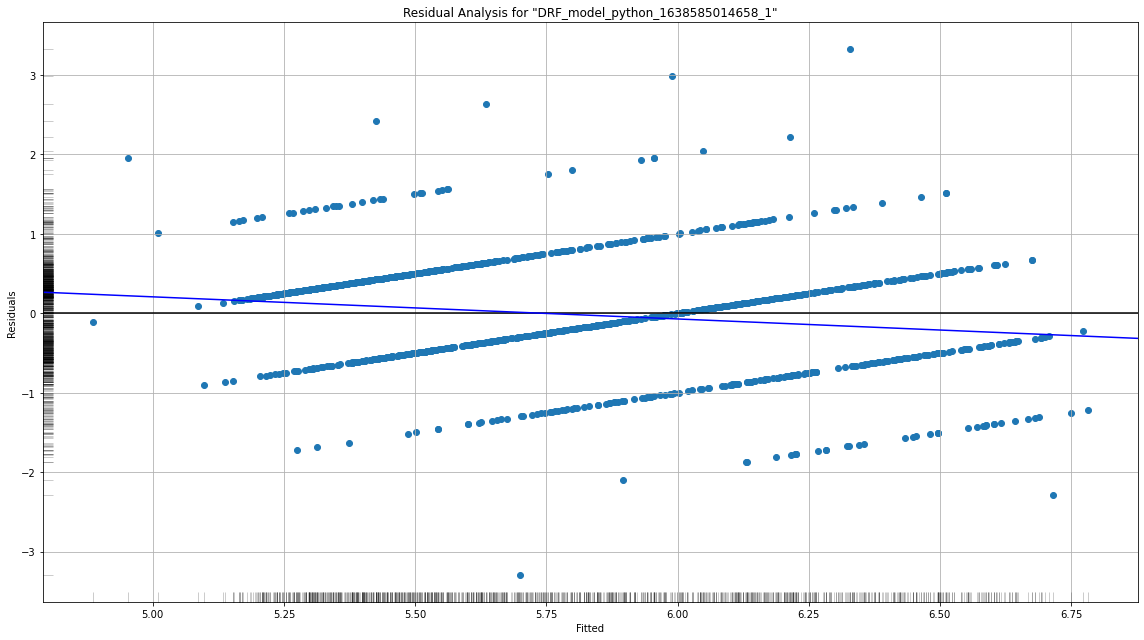

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

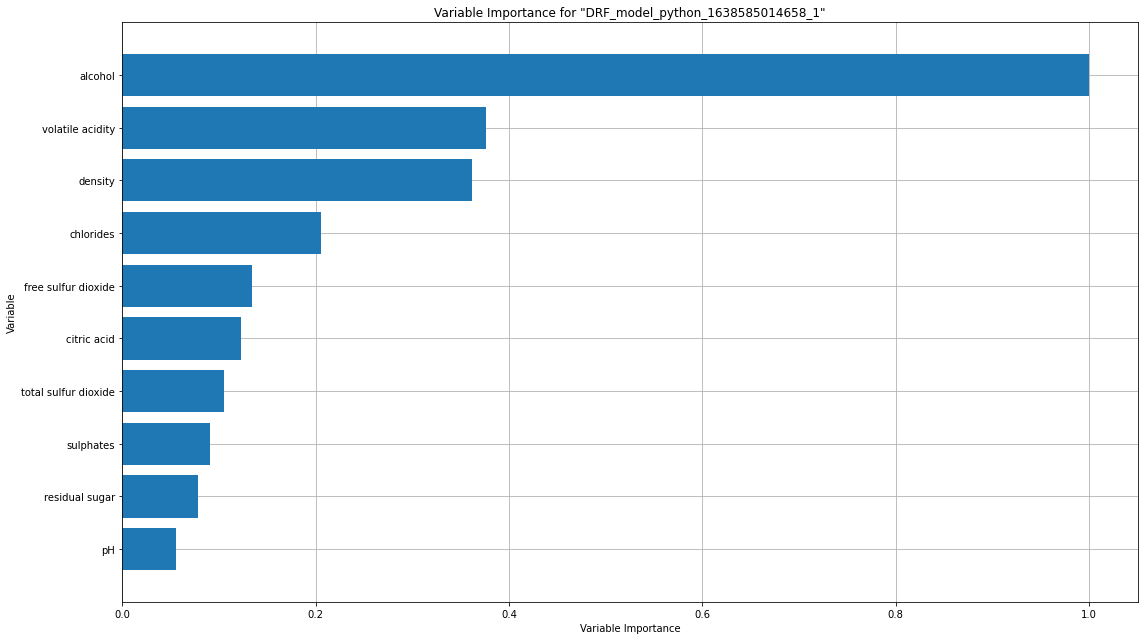

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

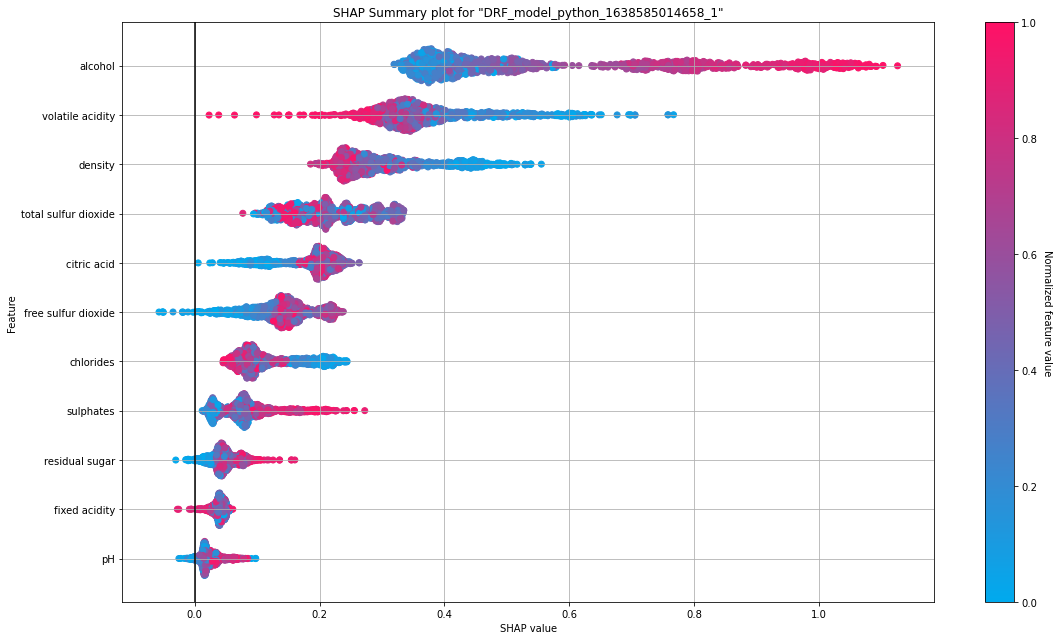

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

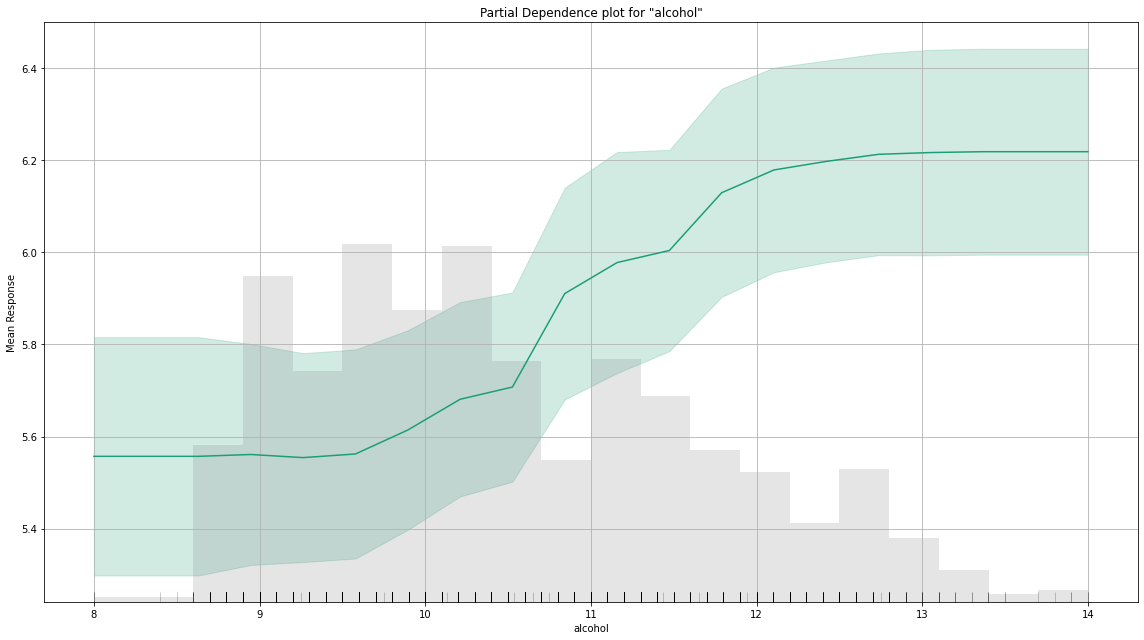

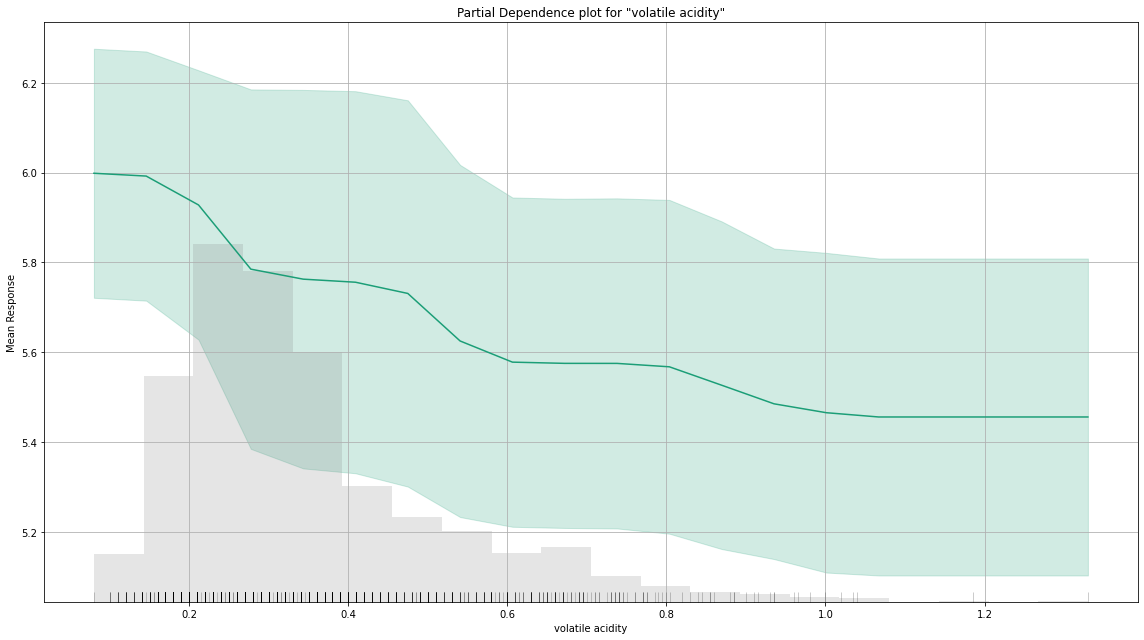

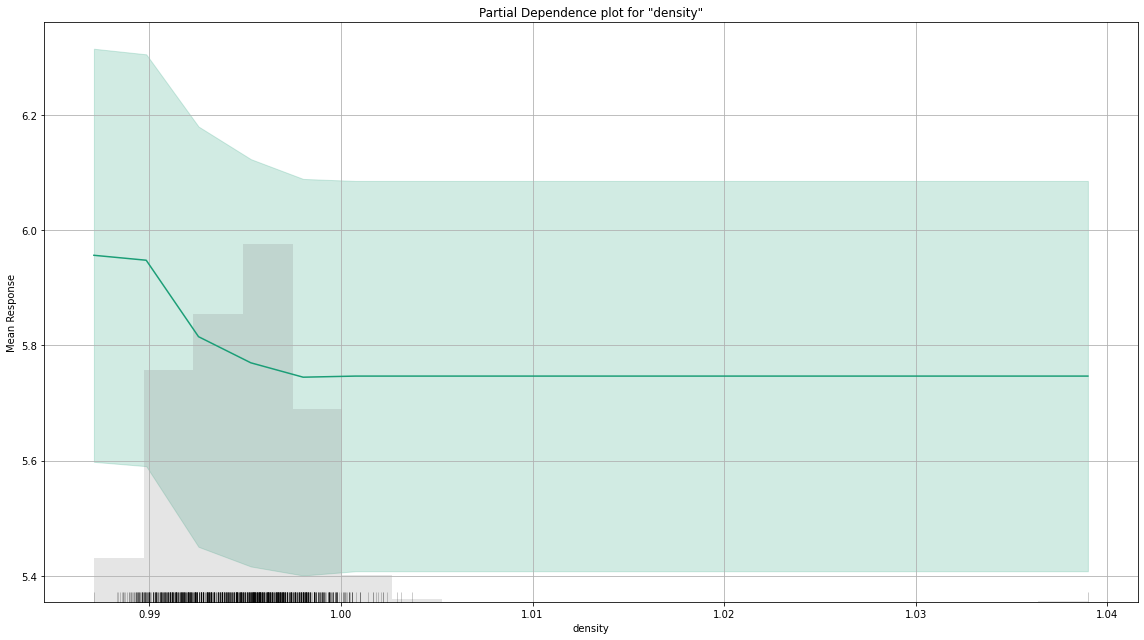

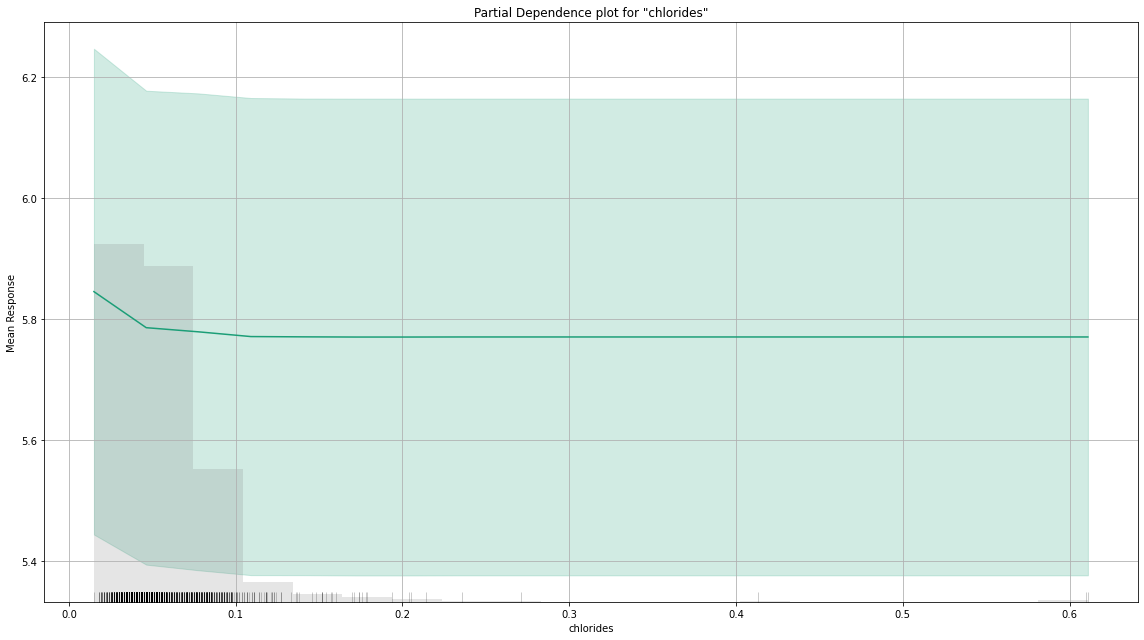

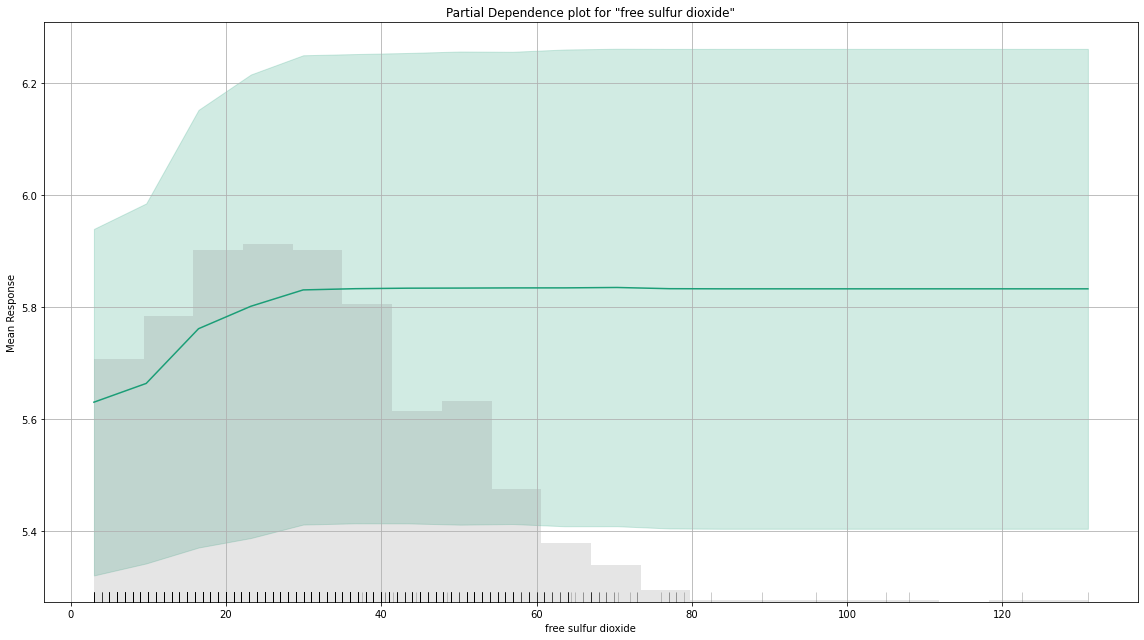

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

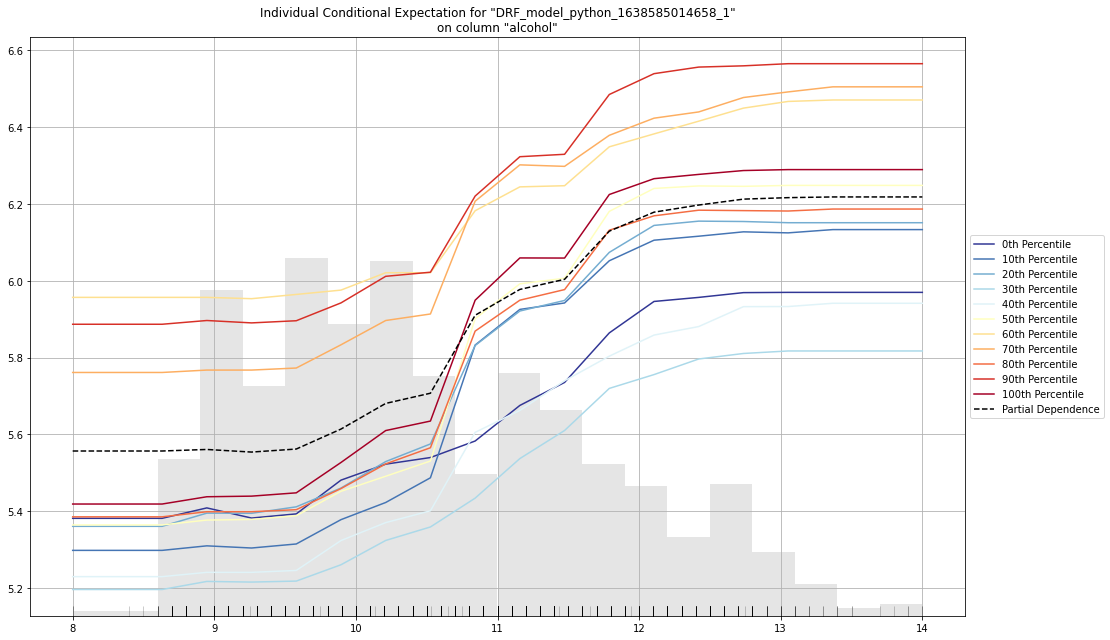

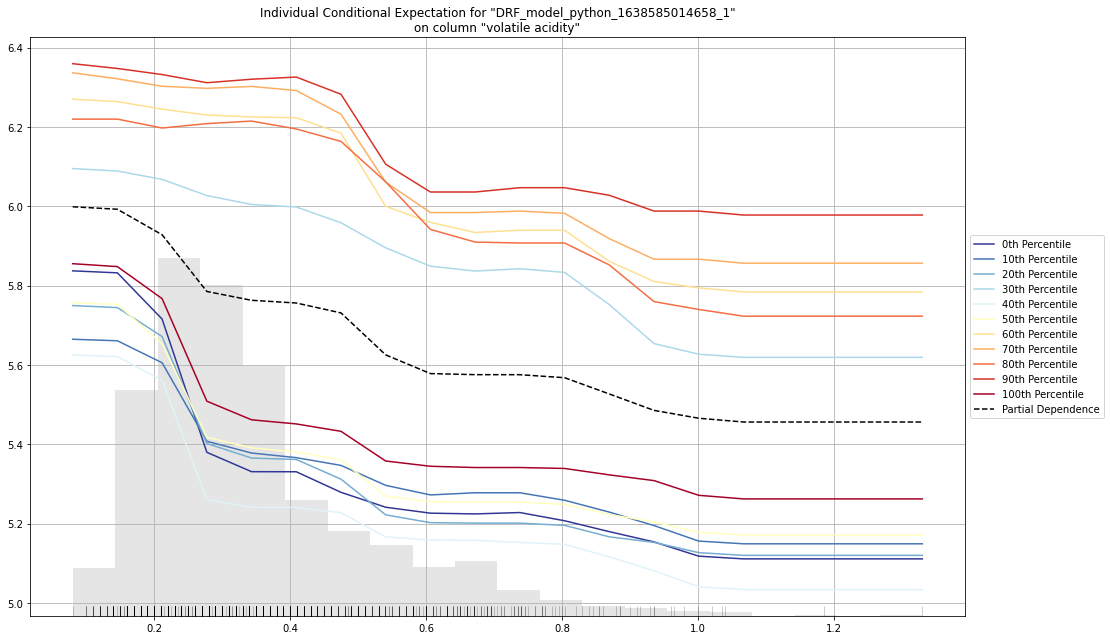

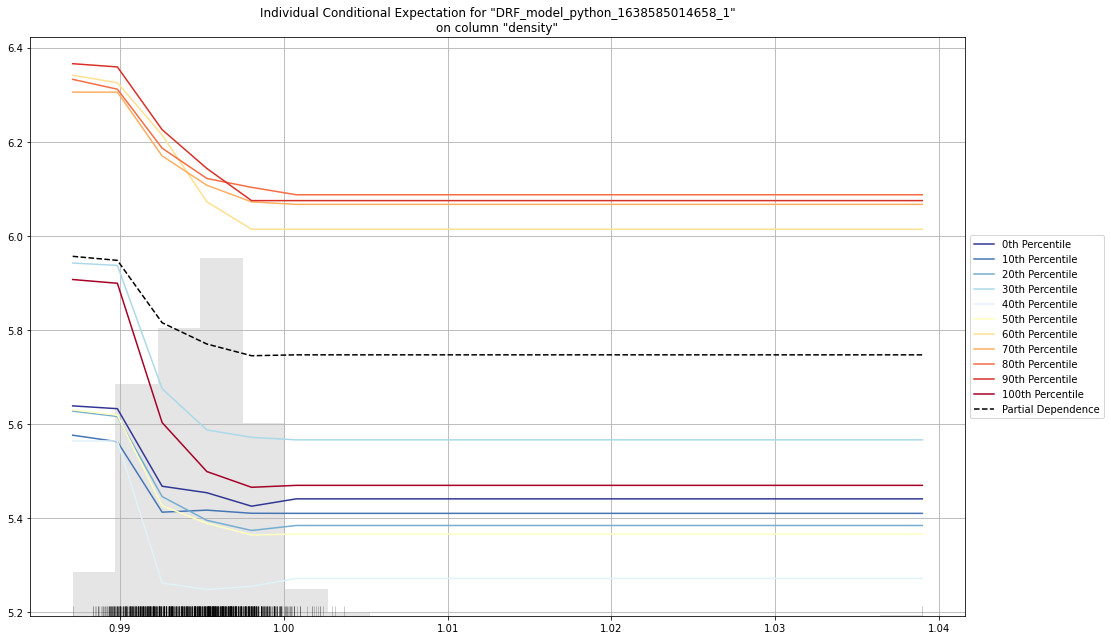

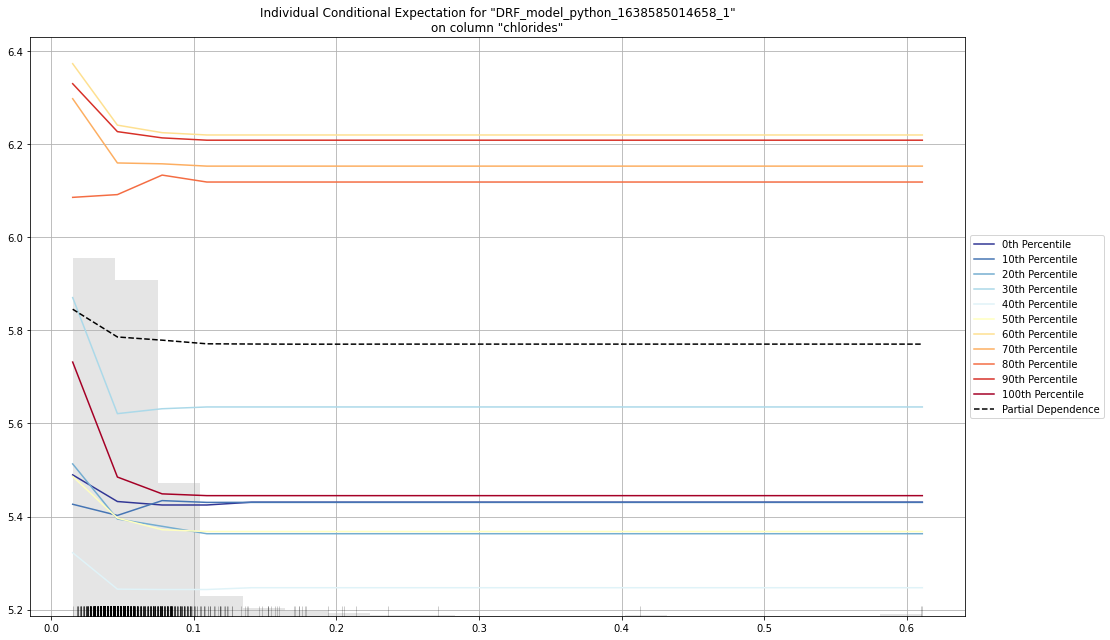

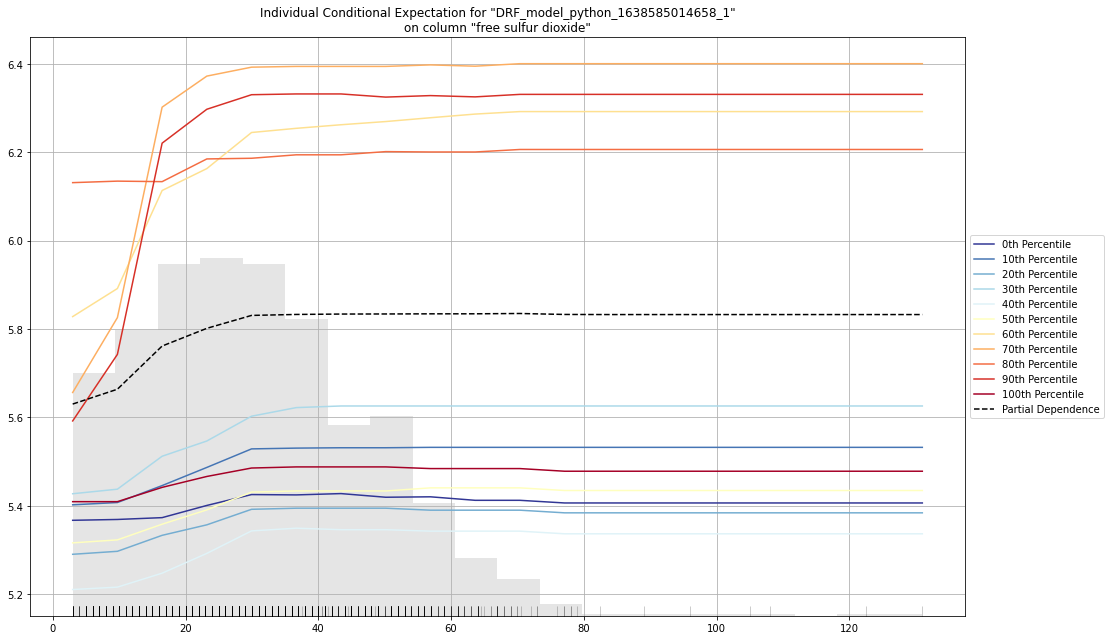

In [32]:
model_explain = rf.explain(fm_test)

In [35]:
type(model_explain)

h2o.explanation._explain.H2OExplanation

https://h2o-release.s3.amazonaws.com/h2o/rel-zizler/4/docs-website/h2o-py/docs/h2o.html#h2o.explain

In [61]:
# 確認できるプロット
model_explain.keys()

odict_keys(['residual_analysis', 'varimp', 'shap_summary', 'pdp', 'ice'])

### Localな解釈

In [70]:
# 解釈するオブザベーション
fm_test[0,:]    # 行番号0

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6,white


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

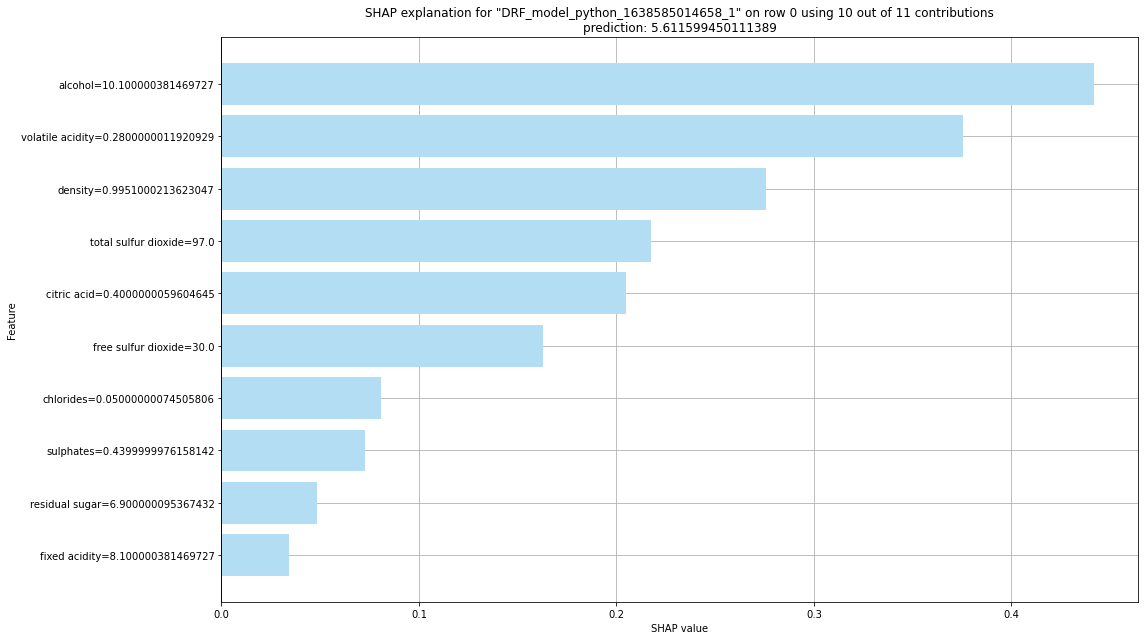

# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

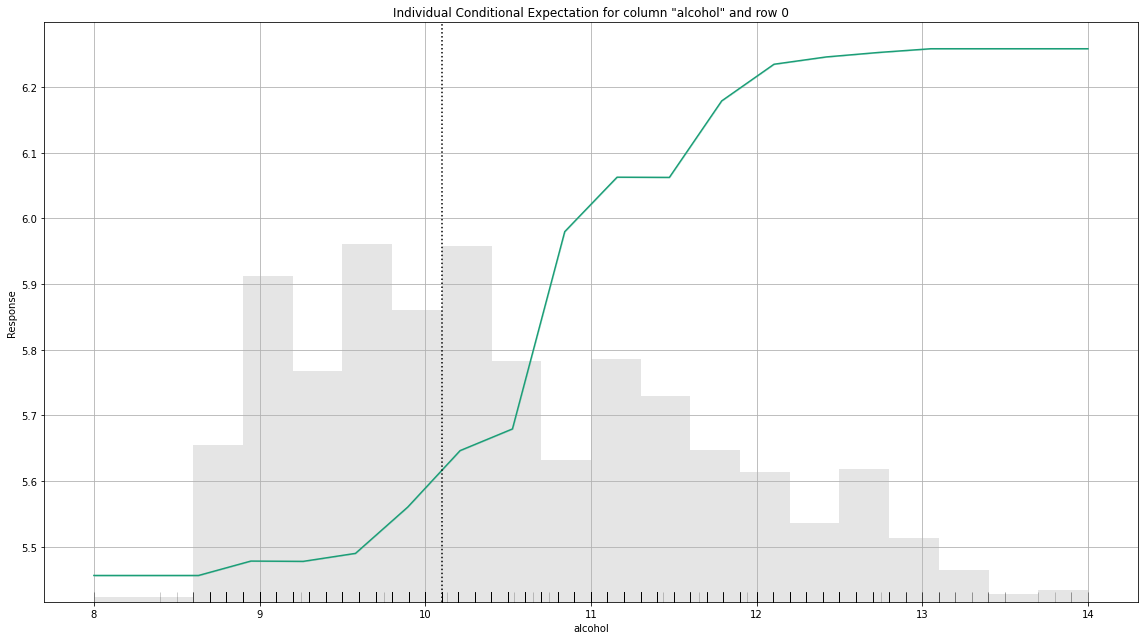

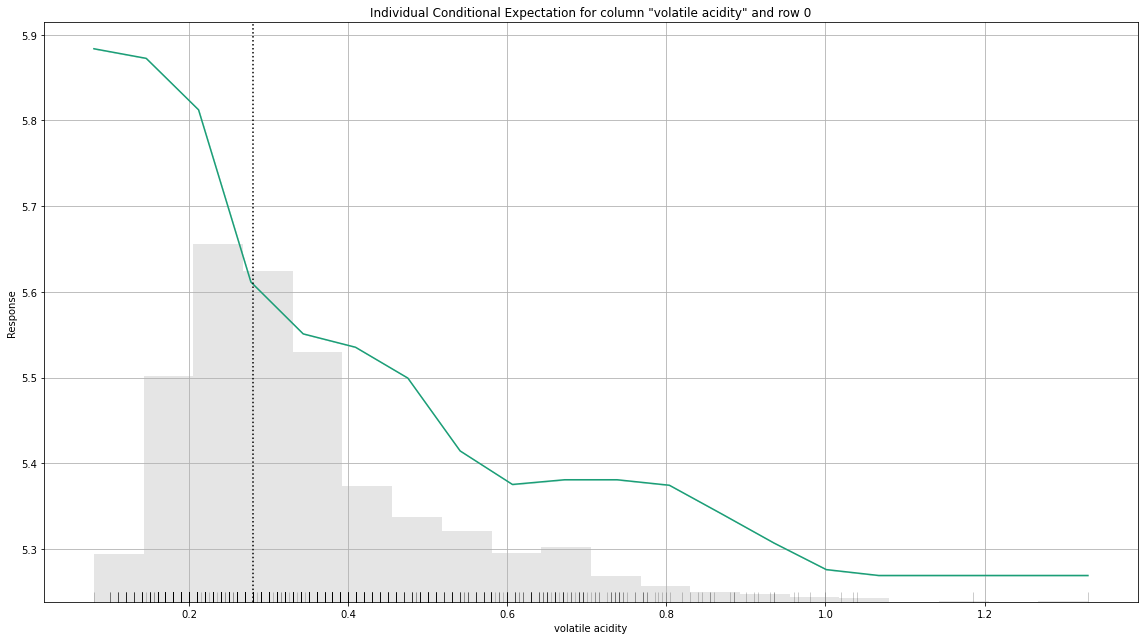

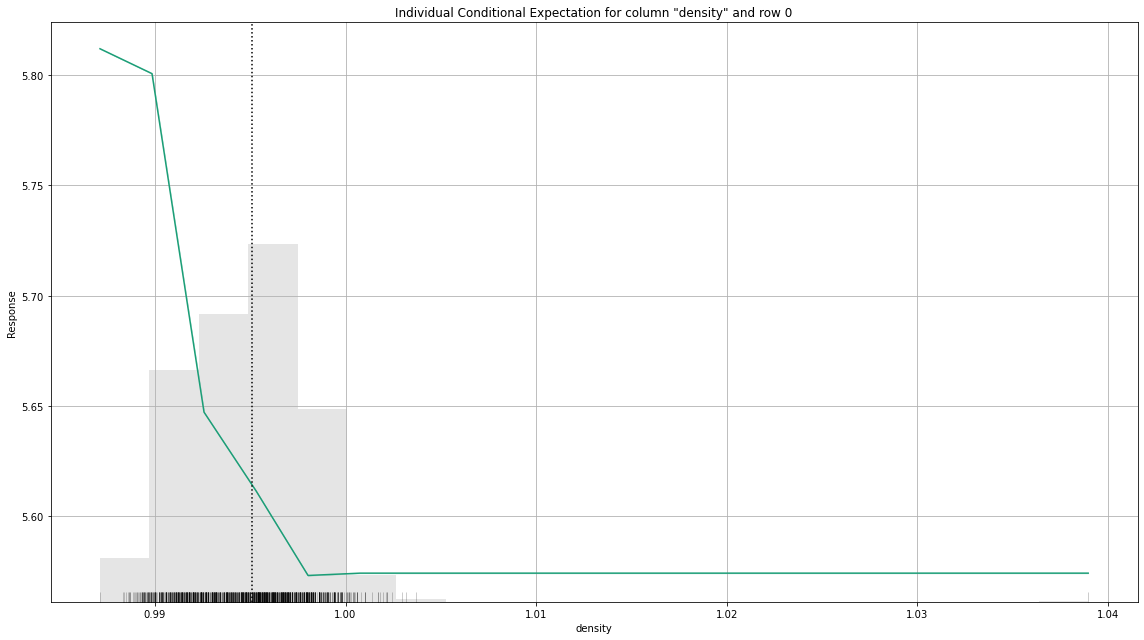

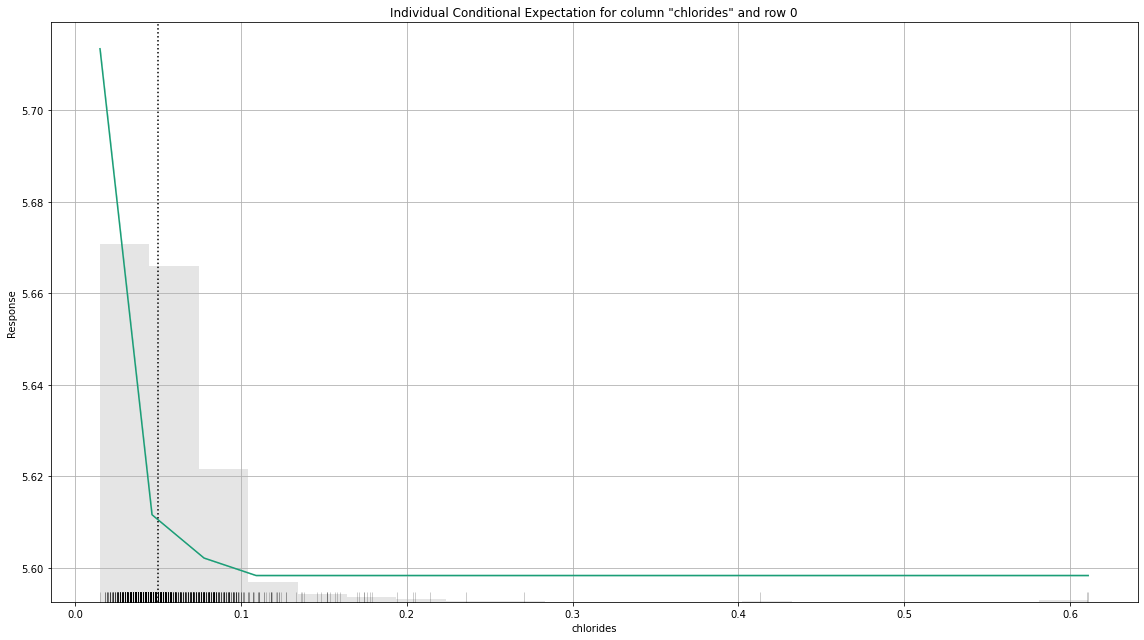

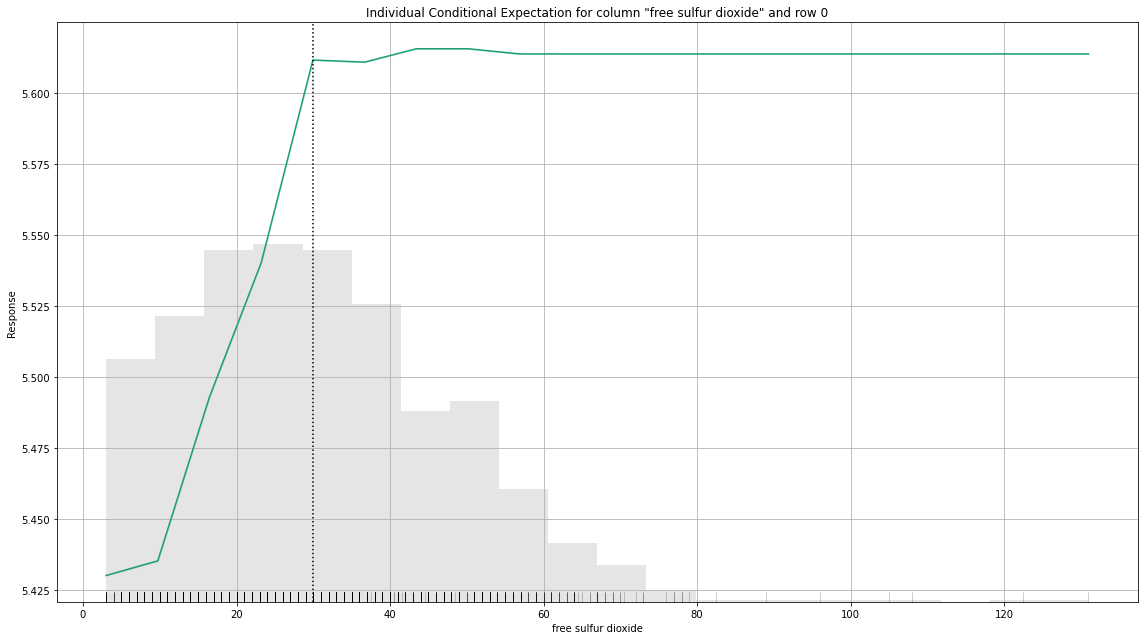

In [40]:
model_explain_obs = rf.explain_row(fm_test, row_index=0)

In [41]:
type(model_explain_obs)

h2o.explanation._explain.H2OExplanation

https://h2o-release.s3.amazonaws.com/h2o/rel-zizler/4/docs-website/h2o-py/docs/h2o.html#h2o.explain_row

In [57]:
model_explain_obs.keys()

odict_keys(['shap_explain_row', 'ice'])

In [72]:
# 予測
predicted_val = rf.predict(fm_test)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [113]:
predicted_val[:3,'predict']    # 先頭3行

predict
5.6116
6.0455
6.2677


In [73]:
# MLI Scoring
explained_val = rf.predict_contributions(fm_test)

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


In [79]:
explained_val[:3,:]    # 先頭3行

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,BiasTerm
0.0343697,0.375704,0.204763,0.0485025,0.0808466,0.163048,0.217309,0.275746,0.0233132,0.0727702,0.441835,3.67339
0.0103299,0.471847,0.222481,0.0128577,0.112465,0.144248,0.261934,0.34253,0.00794244,0.0672424,0.718234,3.67339
0.0356484,0.125131,0.17593,0.016966,0.163033,0.202481,0.253585,0.449979,0.0636754,0.0550693,1.05281,3.67339


In [115]:
# 合計が予測結果に一致
[explained_val[i,:].sum() for i in range(3)]

[5.611599311232567, 6.0455050421878695, 6.267698455601931]